This is a short tutorial on how to use the software to compute Elder-rule-staircodes.

In [1]:
import sys
sys.path.append('/home/cai.507/Documents/DeepLearning/Clustering/') # modify the path accordingly
import matplotlib.pylab as plt
from sklearn.cluster import AgglomerativeClustering

from ER.gen.ptc_model import toy_dataset
from ER.ER_staircode import density, slice_dgm_, plot_Ix, assemble
BACKEND = 'multiprocessing'
linkage_kwargs = {'distance_threshold': 0, 'n_clusters': None, 'linkage': 'single'}


/home/cai.507/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Prepare data

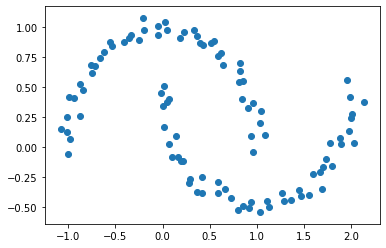

X (np.ndarry): (100, 2)
f(np.ndarry): (100,)


In [2]:
    # generate 2d point clouds
    X_origin, _, _ = toy_dataset(n_sample=100, name='moon')  # X_origin is of shape (n, 2)
    n_pt = X_origin.shape[0]
    f = - density(X_origin, bw=0.1).reshape(n_pt, ) # bw is the bandwidth for kernel density estimation

    # sort by function value
    f_inds = f.argsort()
    X = X_origin[f_inds]
    f = f[f_inds]
    
    # plot data
    plt.scatter(X[:, 0], X[:, 1]); plt.show()
    print(f'X (np.ndarry): {X.shape}')
    print(f'f(np.ndarry): {f.shape}')

Now we are going to compute the ER staircode.

# Compute ER-staircode

In [3]:
stairs = []
for i in range(2, n_pt + 1):
    X_ = X[:i, :]
    model = AgglomerativeClustering(**linkage_kwargs)
    model = model.fit(X_)
    decoration = slice_dgm_(model, X_, f[:i])
    stairs.append(decoration)
I_x = assemble(stairs, f)

# Visualize ER-staircode

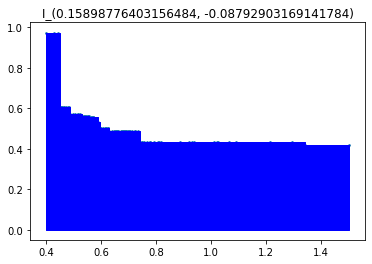

In [4]:
# for visual simplicity, we only plot one staircode
key = '(0.15898776403156484, -0.08792903169141784)'
plot_Ix(I_x, key=key)
